## Final Analysis for Global Top 50 Trends

Import libraries for analysis

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
pd.set_option("max_rows", None)

Import the data that we captured in our pipeline

In [2]:
df = pd.read_csv('~/w205/spotify-trends/analysis/final_data.csv')
df['date'] = pd.to_datetime(df['date'])
df['pull_date'] = df['date'].dt.date
df

,date,rank,song_name,song_id,album_name,artist,release_date,id,valence,tempo,danceability,energy,loudness,duration_ms,pull_date
0,2021-11-17 17:30:02.130,1,All Too Well (10 Minute Version) (Taylor's Ver...,5enxwA8aAbwZbf5qCHORXi,Red (Taylor's Version),Taylor Swift,2021-11-12,5enxwA8aAbwZbf5qCHORXi,0.205,93.023,0.631,0.518,-8.771,613027,2021-11-17
1,2021-11-18 16:00:04.739,1,All Too Well (10 Minute Version) (Taylor's Ver...,5enxwA8aAbwZbf5qCHORXi,Red (Taylor's Version),Taylor Swift,2021-11-12,5enxwA8aAbwZbf5qCHORXi,0.205,93.023,0.631,0.518,-8.771,613027,2021-11-18
2,2021-11-19 16:00:02.631,2,All Too Well (10 Minute Version) (Taylor's Ver...,5enxwA8aAbwZbf5qCHORXi,Red (Taylor's Version),Taylor Swift,2021-11-12,5enxwA8aAbwZbf5qCHORXi,0.205,93.023,0.631,0.518,-8.771,613027,2021-11-19
3,2021-11-20 16:00:02.889,6,All Too Well (10 Minute Version) (Taylor's Ver...,5enxwA8aAbwZbf5qCHORXi,Red (Taylor's Version),Taylor Swift,2021-11-12,5enxwA8aAbwZbf5qCHORXi,0.205,93.023,0.631,0.518,-8.771,613027,2021-11-20
4,2021-11-21 16:00:02.386,5,All Too Well (10 Minute Version) (Taylor's Ver...,5enxwA8aAbwZbf5qCHORXi,Red (Taylor's Version),Taylor Swift,2021-11-12,5enxwA8aAbwZbf5qCHORXi,0.205,93.023,0.631,0.518,-8.771,613027,2021-11-21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,2021-11-29 16:00:03.607,43,Driving Home for Christmas - 2019 Remaster,27qAMKrDdKEs8HDXcvR24R,"Dancing with Strangers (Deluxe Edition, 2019 R...",Chris Rea,1987-08-02,27qAMKrDdKEs8HDXcvR24R,0.866,180.183,0.513,0.583,-10.863,241627,2021-11-29
796,2021-11-29 16:00:03.607,46,Snowman,7uoFMmxln0GPXQ0AcCBXRq,Everyday Is Christmas (Deluxe Edition),Sia,2018-11-01,7uoFMmxln0GPXQ0AcCBXRq,0.326,104.957,0.716,0.512,-6.257,165907,2021-11-29
797,2021-11-29 16:00:03.607,47,Let It Snow! Let It Snow! Let It Snow! (with T...,4kKdvXD0ez7jp1296JmAts,Christmas Songs by Sinatra,Frank Sinatra,1994-11-08,4kKdvXD0ez7jp1296JmAts,0.836,142.169,0.652,0.259,-13.336,155453,2021-11-29
798,2021-12-02 16:00:03.942,41,drivers license,5wANPM4fQCJwkGd4rN57mH,SOUR,Olivia Rodrigo,2021-05-21,5wANPM4fQCJwkGd4rN57mH,0.137,143.875,0.561,0.431,-8.810,242013,2021-12-02


### Analysis of all songs

Spotify captures sentiment data in the form of a "valence" score. The company defines this attribute as "a measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track." The happier the track, the closer the valence score will be to 1.0. Let's start our analysis by looking generally at how  valence along with attributes like tempo, danceability and energy look like over the last 2 weeks of November.

In [4]:
df_daily = df.groupby("pull_date")[["valence", "tempo", "danceability", "energy"]].mean().reset_index()
df_daily

,pull_date,valence,tempo,danceability,energy
0,2021-11-17,0.493878,123.56050,0.65000,0.63290
1,2021-11-18,0.490738,123.80136,0.65142,0.63168
2,2021-11-19,0.478078,122.65864,0.65502,0.62446
3,2021-11-20,0.464840,126.67350,0.63890,0.60790
4,2021-11-21,0.480800,126.49060,0.63636,0.61328
5,2021-11-22,0.480800,126.49060,0.63636,0.61328
6,2021-11-23,0.480800,126.49060,0.63636,0.61328
7,2021-11-24,0.477938,124.82688,0.63858,0.60824
8,2021-11-25,0.480678,123.43440,0.63820,0.61380
9,2021-11-26,0.499598,124.24684,0.65310,0.63362


We plotted the various metrics provided by the API including valence, tempo, danceability and energy.

It does not look like there were any consistent trends across these metrics during this time period.

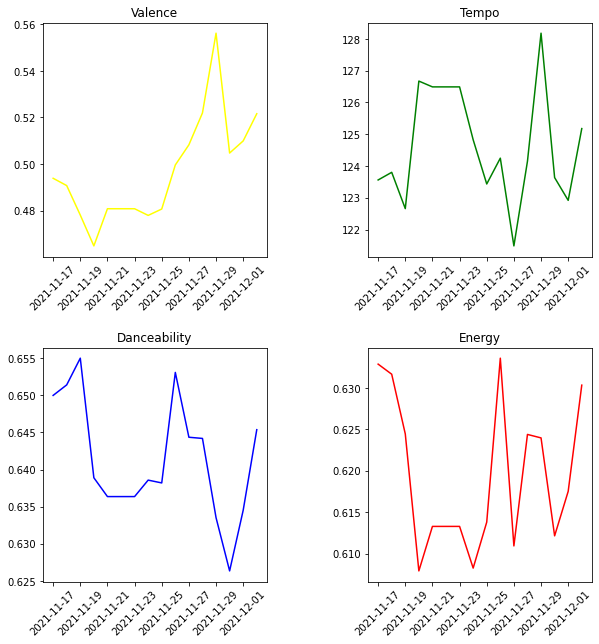

In [5]:
fig, ax = plt.subplots(2, 2, figsize=(10,10))
fig.tight_layout(pad=7)
ax[0, 0].plot(df_daily["pull_date"], df_daily["valence"], color = 'yellow')
ax[0, 0].set_title('Valence')
ax[0, 0].tick_params('x',labelrotation=45)
ax[0, 1].plot(df_daily["pull_date"], df_daily["tempo"], color = 'green')
ax[0, 1].set_title('Tempo')
ax[0, 1].tick_params('x', labelrotation=45)
ax[1, 0].plot(df_daily["pull_date"], df_daily["danceability"], color = 'blue')
ax[1, 0].set_title('Danceability')
ax[1, 0].tick_params('x',labelrotation=45)
ax[1, 1].plot(df_daily["pull_date"], df_daily["energy"], color = 'red')
ax[1, 1].set_title('Energy')
ax[1, 1].tick_params('x',labelrotation=45)

### Artist count by frequency

The top 10 artists did not have "holiday" songs despite holiday songs starting to appear in the Global Top 50.

In [6]:
count = df['artist'].value_counts()
print(count)

Adele                  101
Lil Nas X               48
Doja Cat                48
Taylor Swift            40
Ed Sheeran              32
CKay                    32
Olivia Rodrigo          27
Bruno Mars              19
Justin Bieber           19
Bad Bunny               16
Lost Frequencies        16
The Weeknd              16
ACRAZE                  16
Måneskin                16
Billie Eilish           16
Swedish House Mafia     16
Tainy                   16
The Kid LAROI           16
Post Malone             16
Elton John              16
Farruko                 16
Imagine Dragons         16
Glass Animals           16
LISA                    16
Coldplay                16
Amaarae                 16
BoyWithUke              16
THE ANXIETY             15
GAYLE                   15
Oliver Tree             14
Mariah Carey            12
ROSALÍA                 11
NEIKED                  10
The Walters              8
Wham!                    7
Brenda Lee               6
Michael Bublé            6
B

### Holiday v. Mainstream Songs

We then extracted all holiday songs to do analysis specifically on those songs.

In [7]:
christmas_songs = ['All I Want for Christmas Is You', 'Last Christmas', 'White Christmas',
                   'It\'s Beginning to Look a Lot like Christmas', 'Jingle Bell Rock',
                   'Rockin\' Around The Christmas Tree', 'Santa Tell Me', 'It\'s the Most Wonderful Time of the Year',
                   'The Christmas Song (Merry Christmas To You)', 'Mistletoe', 'Feliz Navidad', 'Underneath the Tree',
                   'Driving Home for Christmas - 2019 Remaster', 'Snowman', 
                   'Let It Snow! Let It Snow! Let It Snow! (with The B. Swanson Quartet)']
mainstream_songs = [i for i in list(set(df.song_name)) if i not in christmas_songs]
print(mainstream_songs)

['Heat Waves', 'MONTERO (Call Me By Your Name)', 'Shivers', 'Happier Than Ever', 'abcdefu', "22 (Taylor's Version)", 'Cold Heart - PNAU Remix', 'Woman', 'Woman Like Me', 'Enemy (with JID) - from the series Arcane League of Legends', 'Mon Amour - Remix', 'traitor', 'Moth To A Flame (with The Weeknd)', 'To Be Loved', 'Can I Get It', 'Smokin Out The Window', 'Lo Siento BB:/ (with Bad Bunny & Julieta Venegas)', 'Do It To It', 'LA FAMA (with The Weeknd)', 'Need to Know', "Red (Taylor's Version)", 'My Little Love', 'drivers license', 'Meet Me At Our Spot', 'Already Dead', 'Oh My God', 'Nothing New (feat. Phoebe Bridgers) (Taylor’s Version) (From The Vault)', 'One Right Now (with The Weeknd)', 'Toxic', 'I Drink Wine', 'THATS WHAT I WANT', 'Hold On', 'Bad Habits', 'I Love You So', 'STAY (with Justin Bieber)', 'All Night Parking (with Erroll Garner) Interlude', 'Enchanted', 'Life Goes On', "All Too Well (10 Minute Version) (Taylor's Version) (From The Vault)", 'SAD GIRLZ LUV MONEY Remix (feat. 

Grouped songs into categories where holiday songs and mainstream songs were separated.

In [14]:
df['is_christmas'] = np.where(df['song_name'].isin(christmas_songs), 1, 0)

In [15]:
christmas_df = df[df['song_name'].isin(christmas_songs)]
mainstream_df = df[df['song_name'].isin(mainstream_songs)]

In [16]:
christmas_df.groupby(['date']).mean()

,rank,valence,tempo,danceability,energy,loudness,duration_ms,is_christmas
date,,,,,,,,
2021-11-21 16:00:02.386,45.000000,0.350000,150.273000,0.336000,0.627000,-7.463000,241107.000000,1.0
2021-11-22 16:00:03.597,28.000000,0.350000,150.273000,0.336000,0.627000,-7.463000,241107.000000,1.0
2021-11-23 16:00:03.808,43.000000,0.350000,150.273000,0.336000,0.627000,-7.463000,241107.000000,1.0
2021-11-24 16:00:03.607,39.000000,0.350000,150.273000,0.336000,0.627000,-7.463000,241107.000000,1.0
2021-11-25 16:00:03.701,31.000000,0.350000,150.273000,0.336000,0.627000,-7.463000,241107.000000,1.0
2021-11-26 16:00:03.108,29.500000,0.648500,128.977500,0.535500,0.552500,-9.967500,252033.500000,1.0
2021-11-27 16:00:03.472,31.666667,0.601833,111.689000,0.511667,0.395500,-10.891000,190904.500000,1.0
2021-11-28 16:00:02.820,28.777778,0.629667,130.439889,0.498667,0.459111,-10.240111,188683.000000,1.0
2021-11-29 16:00:03.607,26.285714,0.667929,136.419786,0.528000,0.508286,-9.835500,190934.357143,1.0


<AxesSubplot:xlabel='date'>

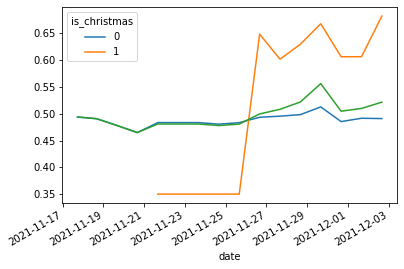

In [17]:
df.groupby(['date','is_christmas']).valence.mean().unstack().plot()
df.groupby(['date']).valence.mean().plot()

# green is average of all songs' valence
# orange is christmas music valence
# blue is mainstream music valence

<AxesSubplot:xlabel='date'>

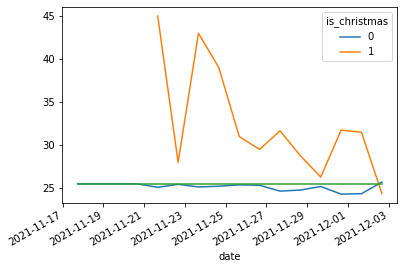

In [18]:
df.groupby(['date','is_christmas'])['rank'].mean().unstack().plot()
df.groupby(['date'])['rank'].mean().plot()

# green is average of all songs' rank
# orange is christmas music rank
# blue is mainstream music rank

<AxesSubplot:xlabel='date'>

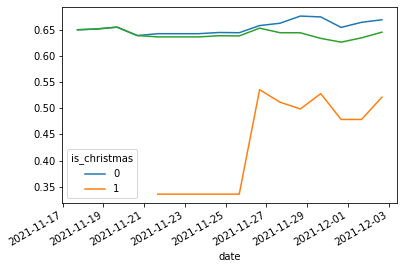

In [19]:
df.groupby(['date','is_christmas'])['danceability'].mean().unstack().plot()
df.groupby(['date'])['danceability'].mean().plot()

# green is average of all songs' danceability
# orange is christmas music danceability
# blue is mainstream music danceability

<AxesSubplot:xlabel='date'>

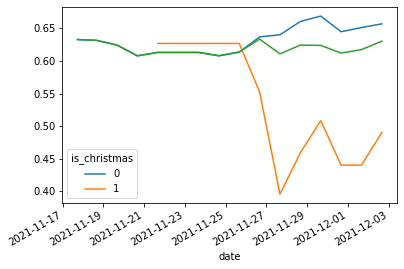

In [20]:
df.groupby(['date','is_christmas'])['energy'].mean().unstack().plot()
df.groupby(['date'])['energy'].mean().plot()

# green is average of all songs' energy
# orange is christmas music energy
# blue is mainstream music energy

The percentage of holiday songs that appeared in the global top 50 over the time period analyzed.

<AxesSubplot:xlabel='date'>

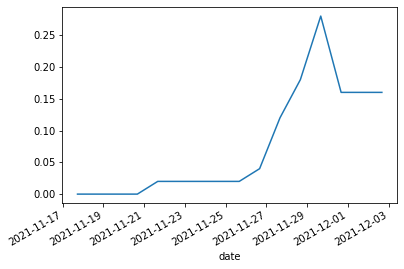

In [21]:
df.groupby(['date']).mean()['is_christmas'].plot()

### All I want for Chistmas is You"

One reason the data collection ends around this time period is because the company does not want user's "Wrapped" stories to be inundated with Christmas music, specifically Mariah Carey's hit "All I want for Christmas is You". One big question that comes up around the holidays is how quickly does this song increase in popularity after Thanksgiving? To answer this question, we isolate and plot the rank of this song in the "Global Top 50" playlist Around Thanksgiving of 2021:

We subsetted the data to isolate the song of interest so let's plot the results against the dates.

In [22]:
mc_df = df.loc[df['song_name'] == 'All I Want for Christmas Is You']
mc_df

,date,rank,song_name,song_id,album_name,artist,release_date,id,valence,tempo,danceability,energy,loudness,duration_ms,pull_date,is_christmas
732,2021-11-21 16:00:02.386,45,All I Want for Christmas Is You,0bYg9bo50gSsH3LtXe2SQn,Merry Christmas,Mariah Carey,1994-11-01,0bYg9bo50gSsH3LtXe2SQn,0.35,150.273,0.336,0.627,-7.463,241107,2021-11-21,1
733,2021-11-22 16:00:03.597,28,All I Want for Christmas Is You,0bYg9bo50gSsH3LtXe2SQn,Merry Christmas,Mariah Carey,1994-11-01,0bYg9bo50gSsH3LtXe2SQn,0.35,150.273,0.336,0.627,-7.463,241107,2021-11-22,1
734,2021-11-23 16:00:03.808,43,All I Want for Christmas Is You,0bYg9bo50gSsH3LtXe2SQn,Merry Christmas,Mariah Carey,1994-11-01,0bYg9bo50gSsH3LtXe2SQn,0.35,150.273,0.336,0.627,-7.463,241107,2021-11-23,1
735,2021-11-24 16:00:03.607,39,All I Want for Christmas Is You,0bYg9bo50gSsH3LtXe2SQn,Merry Christmas,Mariah Carey,1994-11-01,0bYg9bo50gSsH3LtXe2SQn,0.35,150.273,0.336,0.627,-7.463,241107,2021-11-24,1
736,2021-11-25 16:00:03.701,31,All I Want for Christmas Is You,0bYg9bo50gSsH3LtXe2SQn,Merry Christmas,Mariah Carey,1994-11-01,0bYg9bo50gSsH3LtXe2SQn,0.35,150.273,0.336,0.627,-7.463,241107,2021-11-25,1
737,2021-11-26 16:00:03.108,19,All I Want for Christmas Is You,0bYg9bo50gSsH3LtXe2SQn,Merry Christmas,Mariah Carey,1994-11-01,0bYg9bo50gSsH3LtXe2SQn,0.35,150.273,0.336,0.627,-7.463,241107,2021-11-26,1
738,2021-11-27 16:00:03.472,13,All I Want for Christmas Is You,0bYg9bo50gSsH3LtXe2SQn,Merry Christmas,Mariah Carey,1994-11-01,0bYg9bo50gSsH3LtXe2SQn,0.35,150.273,0.336,0.627,-7.463,241107,2021-11-27,1
739,2021-11-28 16:00:02.820,6,All I Want for Christmas Is You,0bYg9bo50gSsH3LtXe2SQn,Merry Christmas,Mariah Carey,1994-11-01,0bYg9bo50gSsH3LtXe2SQn,0.35,150.273,0.336,0.627,-7.463,241107,2021-11-28,1
740,2021-11-29 16:00:03.607,3,All I Want for Christmas Is You,0bYg9bo50gSsH3LtXe2SQn,Merry Christmas,Mariah Carey,1994-11-01,0bYg9bo50gSsH3LtXe2SQn,0.35,150.273,0.336,0.627,-7.463,241107,2021-11-29,1
741,2021-11-30 16:00:04.874,11,All I Want for Christmas Is You,0bYg9bo50gSsH3LtXe2SQn,Merry Christmas,Mariah Carey,1994-11-01,0bYg9bo50gSsH3LtXe2SQn,0.35,150.273,0.336,0.627,-7.463,241107,2021-11-30,1


From this plot we can see that the song hit it's peak of 3rd ranked song on Global Top 50 on the Monday after Thanksgiving in 2021. The popularity then dipped slightly, but started increasing again at the Beginning of December.

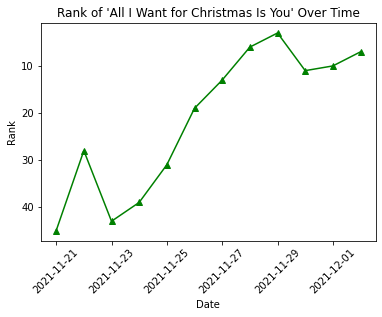

In [23]:
plt.plot(mc_df['pull_date'], mc_df['rank'], color = 'green', linewidth=1.5, marker = '^')
plt.gca().invert_yaxis()
plt.xticks(rotation = 45)
plt.title("Rank of 'All I Want for Christmas Is You' Over Time")
plt.xlabel("Date")
plt.ylabel("Rank")
plt.show()